# Anomaly Detection Assignments

## 1. Isolation Forests

In [1]:
import pandas as pd

In [3]:
# 1a. Open the tripadvisor_reviews.csv file

df = pd.read_csv("../Data/tripadvisor_reviews.csv")
df.head()

,user_id,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating
0,User 1,1.93,2.8,3.29,1.62
1,User 2,2.02,3.2,3.66,1.64
2,User 3,2.22,1.8,1.54,1.53
3,User 4,1.45,2.8,1.29,1.57
4,User 5,1.51,2.2,2.18,1.57


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                980 non-null    object 
 1   avg_museum_rating      980 non-null    float64
 2   avg_park_rating        980 non-null    float64
 3   avg_restaurant_rating  980 non-null    float64
 4   avg_nightlife_rating   980 non-null    float64
dtypes: float64(4), object(1)
memory usage: 38.4+ KB


In [15]:
# 1b. Remove the user_id column

X = df.iloc[:,1:]
X.head()

,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating
0,1.93,2.8,3.29,1.62
1,2.02,3.2,3.66,1.64
2,2.22,1.8,1.54,1.53
3,1.45,2.8,1.29,1.57
4,1.51,2.2,2.18,1.57


In [17]:
# 1c. View the min and max of each rating
X.describe()

,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating
count,980.000000,980.000000,980.000000,980.000000
mean,1.893194,2.352612,2.013306,1.532500
std,0.326912,0.478280,0.788607,0.279731
min,1.340000,1.000000,1.130000,1.150000
25%,1.670000,2.080000,1.270000,1.410000
50%,1.830000,2.280000,1.820000,1.500000
75%,2.020000,2.560000,2.572500,1.580000
max,4.220000,4.640000,4.620000,4.440000


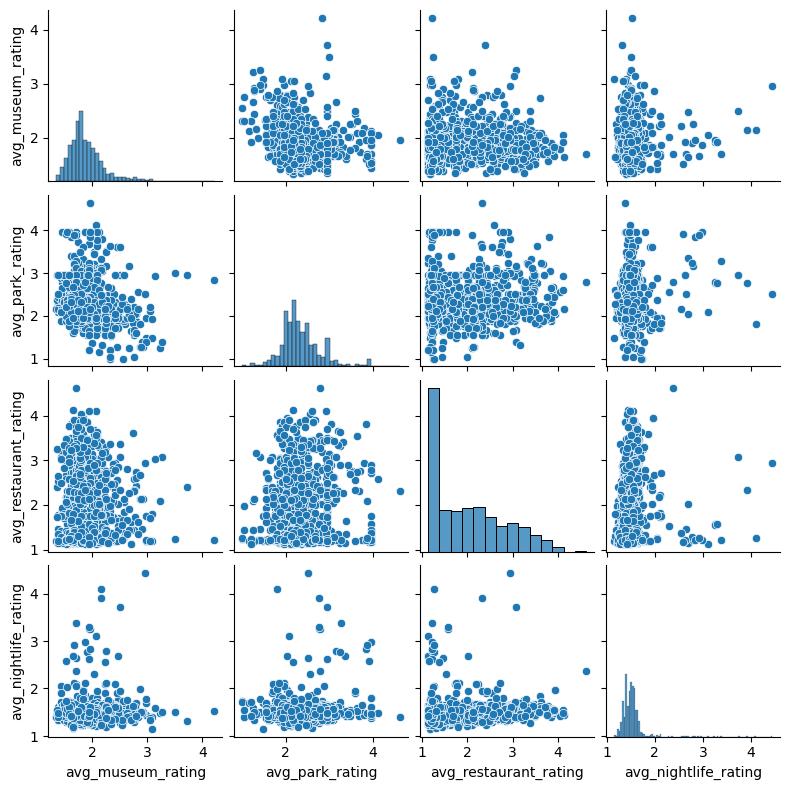

In [19]:
# 2. Visualize the data using a seaborn pair plot
import seaborn as sns 
sns.pairplot(X,height = 2)

In [23]:
# 3. Fit an Isolation Forest model using a contamination of 1%
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination= 0.01)
model.fit(X)

IsolationForest(contamination=0.01)

In [25]:
model.predict(X) # to view anomalies 

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [27]:
df['anomaly'] = model.predict(X) # save this as a new anomaly column 

#df['anomaly_scores'] = model.decision_function(X)

In [29]:
df.head()

,user_id,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating,anomaly
0,User 1,1.93,2.8,3.29,1.62,1
1,User 2,2.02,3.2,3.66,1.64,1
2,User 3,2.22,1.8,1.54,1.53,1
3,User 4,1.45,2.8,1.29,1.57,1
4,User 5,1.51,2.2,2.18,1.57,1


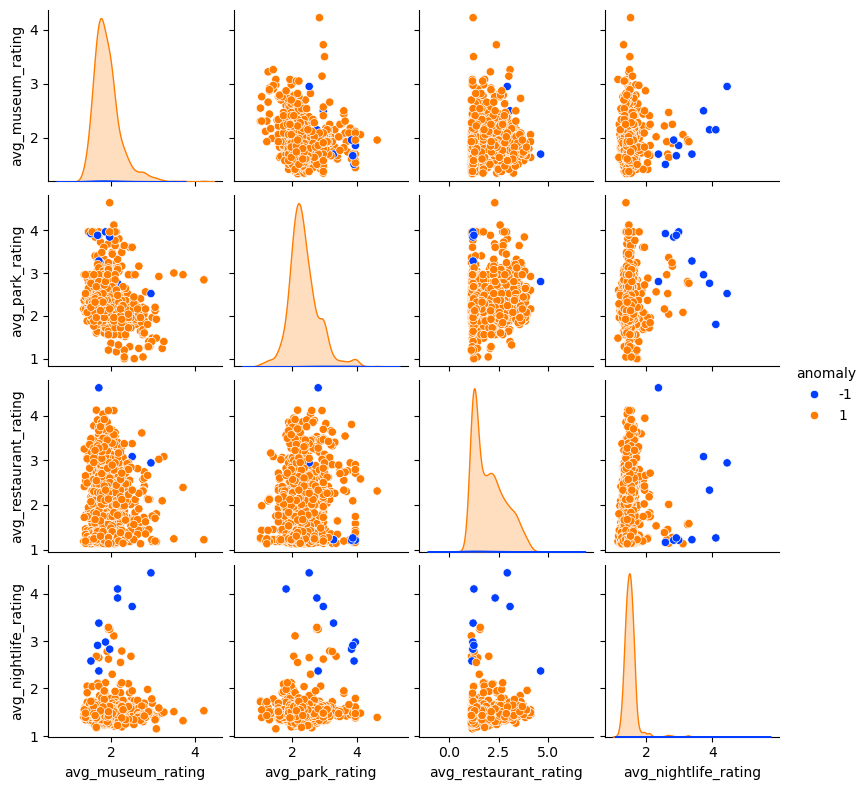

In [31]:
# 4. Visualising  the anomalies on the seaborn pair plot
sns.pairplot(df, hue ='anomaly' , palette='bright' ,height = 2) ;

In [33]:
# 6. Modify the contamination to 0.5% to capture fewer anomalies and visualize the differences

model2 = IsolationForest(contamination= 0.005)
model2.fit(X)



IsolationForest(contamination=0.005)

In [35]:
df['anomaly2'] = model2.predict(X)
df.head()

,user_id,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating,anomaly,anomaly2
0,User 1,1.93,2.8,3.29,1.62,1,1
1,User 2,2.02,3.2,3.66,1.64,1,1
2,User 3,2.22,1.8,1.54,1.53,1,1
3,User 4,1.45,2.8,1.29,1.57,1,1
4,User 5,1.51,2.2,2.18,1.57,1,1


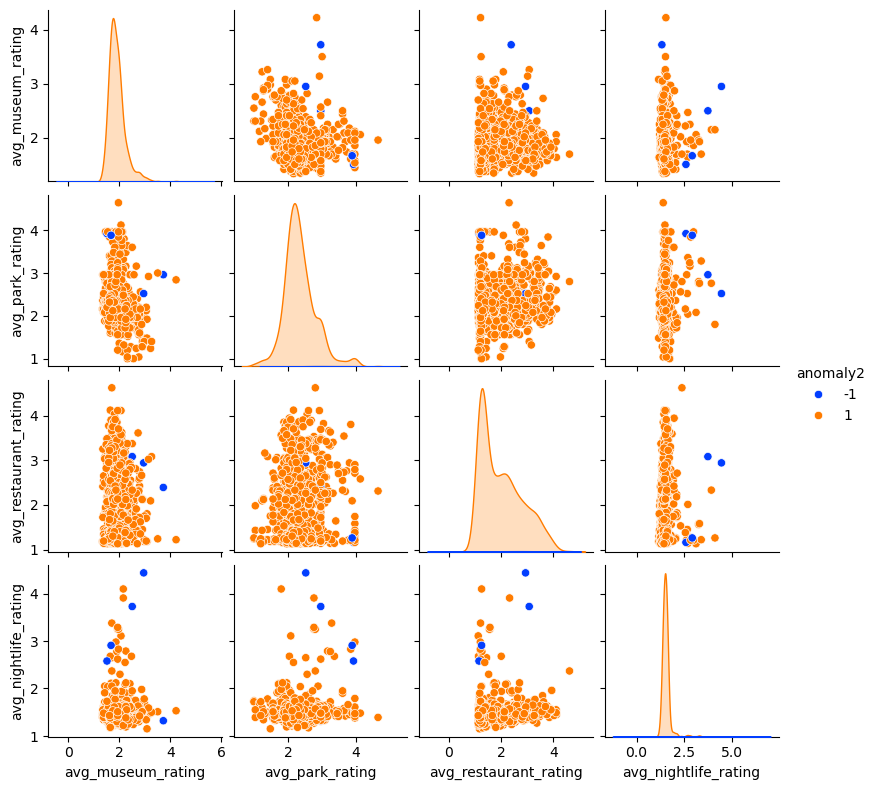

In [37]:
sns.pairplot(df.drop(columns = ['anomaly']), hue = 'anomaly2', palette = 'bright', height = 2);

## 2. DBSCAN

In [39]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

#### DBSCAN Hyperparameter Tuning Function

In [42]:

def tune_dbscan(data):

    results = []

    # define a range of eps and min_samples values to loop through
    eps_values = np.arange(.1, 2, .1)
    min_samples_values = np.arange(2, 10, 1)

    # loop through the combinations of eps and min_samples
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(data)
            labels = dbscan.labels_

            # count the number of clusters (excluding noise points labeled as -1)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

            # count the number of noise points (labeled as -1)
            n_noise = list(labels).count(-1)

            # calculate the silhouette score (excluding noise points)
            if n_clusters > 1:  # silhouette score requires at least 2 clusters
                silhouette = silhouette_score(data, labels, metric='euclidean', sample_size=None)
            else:
                silhouette = None

            results.append([eps, min_samples, n_clusters, n_noise, silhouette])

    # put the results in a dataframe
    dbscan_results = pd.DataFrame(results, columns=["Eps", "Min Samples", "Number of Clusters",
                                                    "Number of Noise Points", "Silhouette Score"])
    return dbscan_results

In [46]:
X.head(2)

,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating
0,1.93,2.8,3.29,1.62
1,2.02,3.2,3.66,1.64


In [48]:
# 2. Apply the function on the tourist rating data set
dbscan_results = tune_dbscan(X)
dbscan_results.head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
0,0.1,2,109,584,-0.310168
1,0.1,3,31,740,-0.458483
2,0.1,4,16,797,-0.445806
3,0.1,5,10,850,-0.382044
4,0.1,6,5,899,-0.178858


In [50]:
# 3. Find the highest silhouette score and note down the eps and min_samples values
dbscan_results.sort_values("Silhouette Score" ,ascending = False).head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
56,0.8,2,2,7,0.441910
53,0.7,7,2,16,0.405540
42,0.6,4,2,17,0.397147
41,0.6,3,2,14,0.391766
40,0.6,2,2,14,0.391766


In [52]:
# 4. Fit a single DBSCAN model using those eps and min_sample values

dbscan = DBSCAN(eps= 0.8 , min_samples=2)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=2)

In [54]:
# 5. Note the anomalies (-1) and visualize them on a pair plot
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [56]:
df.head(3)

,user_id,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating,anomaly,anomaly2
0,User 1,1.93,2.8,3.29,1.62,1,1
1,User 2,2.02,3.2,3.66,1.64,1,1
2,User 3,2.22,1.8,1.54,1.53,1,1


In [58]:
df['anomaly_dbscan'] =dbscan.labels_
df.head()

,user_id,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating,anomaly,anomaly2,anomaly_dbscan
0,User 1,1.93,2.8,3.29,1.62,1,1,0
1,User 2,2.02,3.2,3.66,1.64,1,1,0
2,User 3,2.22,1.8,1.54,1.53,1,1,0
3,User 4,1.45,2.8,1.29,1.57,1,1,0
4,User 5,1.51,2.2,2.18,1.57,1,1,0


In [64]:
# to view the anomalies 
df[df['anomaly_dbscan']== -1] 


,user_id,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating,anomaly,anomaly2,anomaly_dbscan
247,User 248,2.50,2.96,3.08,3.73,-1,-1,-1
274,User 275,2.15,2.76,2.33,3.91,-1,1,-1
501,User 502,3.72,2.96,2.39,1.32,1,-1,-1
601,User 602,2.15,1.80,1.26,4.10,-1,1,-1
666,User 667,2.95,2.52,2.94,4.44,-1,-1,-1
795,User 796,3.14,2.92,3.02,1.59,1,1,-1
915,User 916,1.70,2.80,4.62,2.37,-1,1,-1


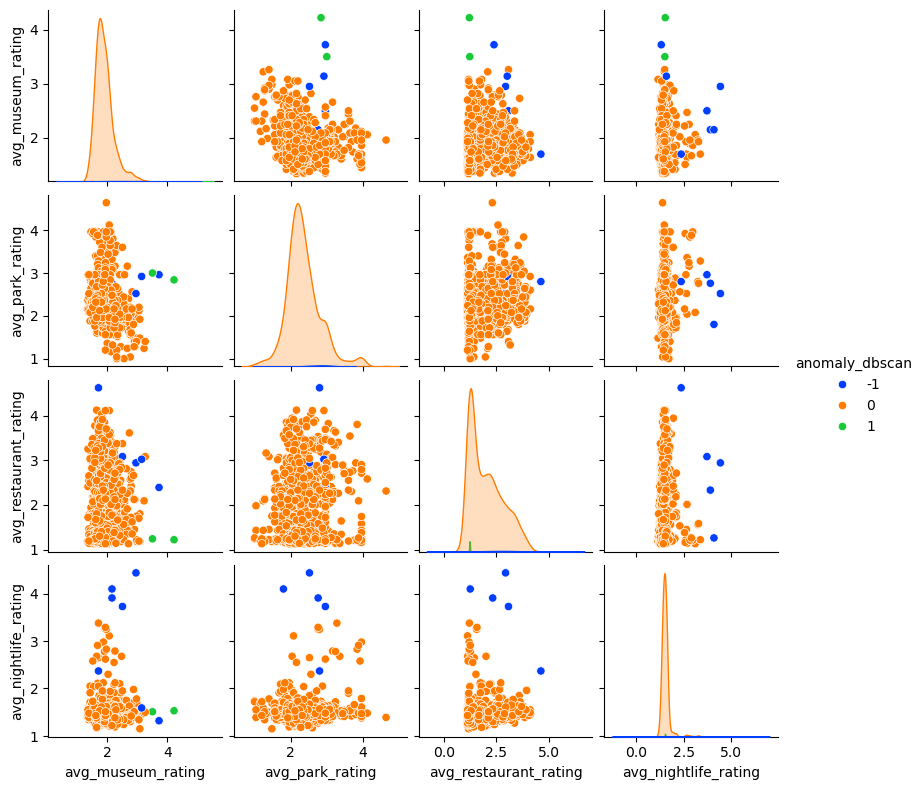

In [66]:
# visualizing the anomalies

sns.pairplot(df.drop(['anomaly','anomaly2'], axis = 1) ,hue = 'anomaly_dbscan', palette= 'bright', height = 2) ; 


In [68]:
df.anomaly_dbscan.value_counts()

anomaly_dbscan
 0    971
-1      7
 1      2
Name: count, dtype: int64